# Goal

The objective of this notebook is to demonstrate and visualize the computation of the pareto frontier.

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from mlos.Optimizers.OptimizationProblem import OptimizationProblem, Objective
from mlos.Optimizers.ParetoFrontier import ParetoFrontier
from mlos.Spaces import SimpleHypergrid, ContinuousDimension


In [2]:
os.getpid()

19024

Let's put toghether a very simple set of points, two of which are on the frontier, one is technically on the frontier, but is dominated by the first two, and several other points are strictly dominated.

Assuming we are trying to maximize both y1 and y2:
* Pareto Efficient Points (y1,y2): (1,2), (2,1)
* Points on the frontier but dominated: (0.5, 2), (1,1), (2, 0.5)
* Strictly dominated points: (0.5, 0.5), (0.5, 1), (0.5, 1.5), (1, 0.5), (1.5, 0.5)

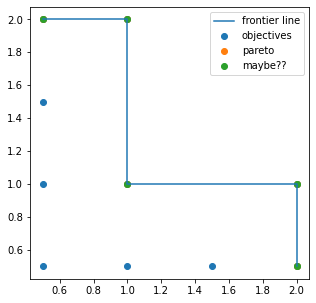

In [5]:
optimization_problem = OptimizationProblem(
    parameter_space=None,
    objective_space=SimpleHypergrid(
        name="objectives",
        dimensions=[
            ContinuousDimension(name='y1', min=0, max=5),
            ContinuousDimension(name='y2', min=0, max=5)
        ]
    ),
    objectives=[
        Objective(name='y1', minimize=False),
        Objective(name='y2', minimize=False)
    ]
)

objectives_df = pd.DataFrame(
    [
        [1, 2],
        [2, 1],
        [0.5, 2],
        [1, 1],
        [2, 0.5],
        [0.5, 0.5],
        [0.5, 1],
        [0.5, 1.5],
        [1, 0.5],
        [1.5, 0.5]
    ],
    columns=['y1', 'y2']
)

pareto_line = pd.DataFrame(
    [
        [0.5, 2],
        [1, 2],
        [1, 1],
        [2, 1],
        [2, 0.5],
    ],
    columns=['y1', 'y2']
)

pareto_df = ParetoFrontier.compute_pareto(optimization_problem, objectives_df)

maybe_pareto_df = pd.DataFrame(
    [
        [0.5, 2],
        [1, 2],
        [1, 1],
        [2, 0.5],
    ],
    columns=['y1', 'y2']
)



plt.figure(figsize=(5, 5))
plt.scatter(objectives_df['y1'], objectives_df['y2'], label="objectives")
plt.scatter(pareto_df['y1'], pareto_df['y2'], label="pareto")
plt.scatter(maybe_pareto_df['y1'], maybe_pareto_df['y2'], label="maybe??")
plt.plot(pareto_line['y1'], pareto_line['y2'], label="frontier line")
plt.legend()